In [90]:
## Logistic Equation

import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

def logistic(r,x):
    return r*x*(1-x)

def iterate(r,initialx,iterations=100):
    outputx = np.zeros(iterations)
    outputx[0] = initialx

    for i in range(1,iterations):
        outputx[i] = logistic(r,outputx[i-1])

    return outputx

def plot_iterations(outputx, iterations=100):
    plt.plot(range(iterations), outputx)
    plt.xticks(range(0,iterations,5))
    plt.xlabel('Iteration')
    plt.ylabel('Output f(x)')
    plt.title('Logistic Equation')
    return plt

def compare(arr1,arr2,ignore_first_el=False):
    compare1 = arr1
    compare2 = arr2

    if ignore_first_el:
        compare1 = arr1[1:]
        compare2 = arr2[1:]
    
    differences = compare1 != compare2

    print(f'Are results equal? {np.array_equal(compare1,compare2)}')

    print("\nDiffering elements and values:")
    for index, (elem1, elem2) in enumerate(zip(compare1, compare2)):
        if differences[index]:
            print(f"Index {index}: {elem1} vs {elem2}, Difference: {abs(elem1 - elem2)}")


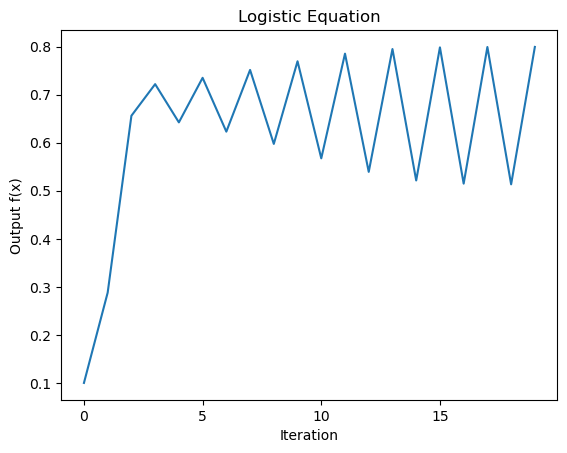

In [58]:
# periodic behavior
# experiment with different intial conditions - they all pull towards a 2 period cycle
double_period_r = 3.2
initial_x = .1
iterations = 20

out = iterate(double_period_r,initial_x,iterations=iterations)
plot_iterations(out,iterations=iterations)

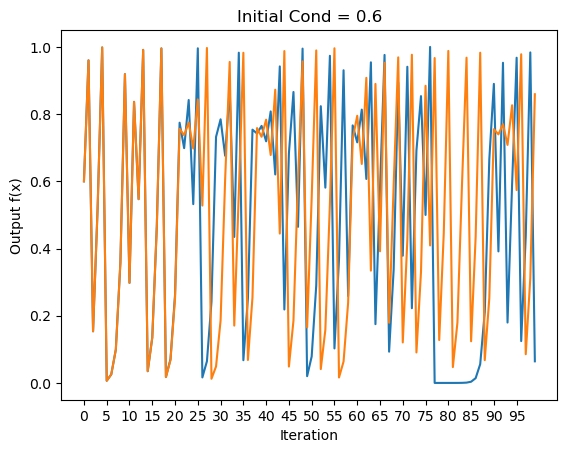

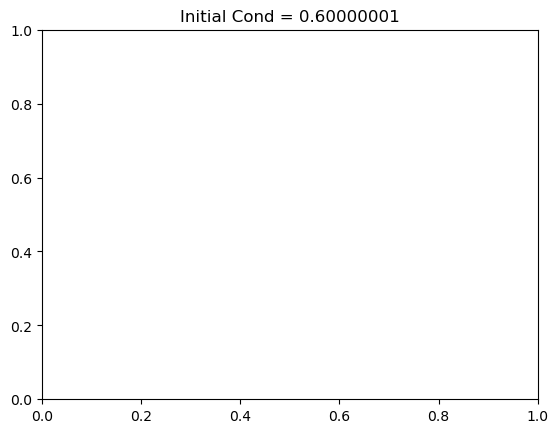

Identical output when x=0.4 or x=0.6
Are results equal? True

Differing elements and values:

x=0.5 and x=0.500000001.
Are results equal? True

Differing elements and values:


In [102]:
### Chaotic behavior
## Using an r value of 4.0 we now have SDIC for x
# Note: try x = 0.5 to see different result, and then use different values that are close to each other

initial_x = 0.6
slight_diff = 0.00000001
iterations = 100

chaotic_r = 4.0

arr1 = iterate(chaotic_r,initial_x,iterations)
arr2 = iterate(chaotic_r,initial_x + slight_diff,iterations)

plt1 = plot_iterations(arr1,iterations)
plt2 = plot_iterations(arr2,iterations)
plt1.title(f'Initial Cond = {initial_x}')
plt1.show()
plt2.title(f'Initial Cond = {initial_x + slight_diff}')
plt2.show()


# notable case where results are identical even though using r = 4
x1 = .4
x2 = .6
arr1 = iterate(chaotic_r,x1,iterations)
arr2 = iterate(chaotic_r,x2,iterations)
print(f'Identical output when x={x1} or x={x2}')
diffs = compare(arr1,arr2,ignore_first_el=True)

# another case where given small enough diff, there is no change in orbit (maybe computer rounding issue?)
initial_x = 0.5
veryclose = initial_x+0.000000001
arr1 = iterate(chaotic_r,initial_x,iterations)
arr2 = iterate(chaotic_r,veryclose,iterations)
print(f'\nx={initial_x} and x={veryclose}.')
compare(arr1,arr2,ignore_first_el=True)

In [1]:
# example of overlapping orbits:

numExprs = 1000
nValues = 50 # sample size is 50
nCategories = 6

c = np.zeros((numExprs,3))

# run 1000 repeated generations
for i in range(numExprs):
    
    # create data - there is no relationship and they would only be correlated by chance
    x = np.random.randint(low=0,high=nCategories,size=nValues) # random ints from 0 to 6, and sample size of 50
    y = np.random.randint(low=0,high=nCategories,size=nValues)
    
    # store correlations - 3 types - for each iteration of the test
    c[i,:] = [ stats.kendalltau(x,y)[0],
               stats.pearsonr(x,y)[0],
               stats.spearmanr(x,y)[0] ]
    
plt.plot(c[:100,:],'s-')
plt.xlabel('Experiment number')
plt.ylabel('Correlation value')
plt.legend(('K','P','S'))
plt.show()